In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import os
import seaborn as sns
import plotly.express as px

#output_data_file = "output_data/.csv"

**1. Importing/Cleaning Data**

In [89]:
data_file = "Resources/life_expectancy_data_region.csv"
life_df = pd.read_csv(data_file)

#trim the dataframe to the columns that we need
life_df = life_df[["Country", "Year", "Region", "Status", "Life expectancy ", "Adult Mortality", "Alcohol", 
                   "percentage expenditure", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure",
                  "Diphtheria ", " HIV/AIDS", "GDP", "Population", "Schooling"]]


life_df = life_df.rename(columns={'Life expectancy ': 'Life Expectancy', 
                        'percentage expenditure': 'Percentage Expenditure',
                        'Measles ': 'Measles',
                        ' BMI ': 'BMI',
                        "Total expenditure": "Total Expenditure",
                        "Diphtheria ": "Diphtheria",
                        " HIV/AIDS": "HIV/AIDS",
                        "under-five deaths": "Under Five Deaths"
                        })  

#Create 2 datasframes (1 with NaN = mean, 1 with NaN = 0)
nan0_df = life_df.fillna(0)
nan0_df = nan0_df.sort_values("Year")
mean_df = life_df.fillna(life_df.mean())
mean_df = mean_df.sort_values("Year")

#Create dataframes for each region for each broad dataframe
em_mean = mean_df[mean_df['Region']=='Eastern Mediterranean']
em_0 = nan0_df[nan0_df['Region']=='Eastern Mediterranean']

euro_mean = mean_df[mean_df['Region']=='Europe']
euro_0 = nan0_df[nan0_df['Region']=='Europe']

africa_mean = mean_df[mean_df['Region']=='Africa']
africa_0 = nan0_df[nan0_df['Region']=='Africa']

americas_mean = mean_df[mean_df['Region']=='Americas']
americas_0 = nan0_df[nan0_df['Region']=='Americas']

wp_mean = mean_df[mean_df['Region']=='Western Pacific']
wp_0 = nan0_df[nan0_df['Region']=='Western Pacific']

sea_mean = mean_df[mean_df['Region']=='South-East Asia']
sea_0 = nan0_df[nan0_df['Region']=='South-East Asia']

#Create Dataframes for Developed vs. Developing Countries
undev_mean= mean_df.loc[mean_df["Status"] == "Developing"]
undev_0 = nan0_df.loc[nan0_df["Status"] == "Developing"]
dev_mean = mean_df.loc[mean_df["Status"] == "Developed"]
dev_0 = nan0_df.loc[nan0_df["Status"] == "Developed"]



In [ ]:
#Outliers


**2. Graphing Code**

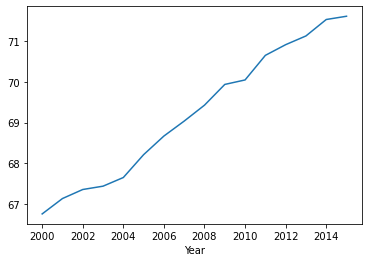

In [74]:
#Basic Line Graph: Life Expectancy vs. Time by Region (switch df for desired region)
le_time = mean_df.groupby(['Year']).mean()['Life Expectancy']
le_time.plot(kind='line')
plt.show()

The r-value is:
0.3933564289352435


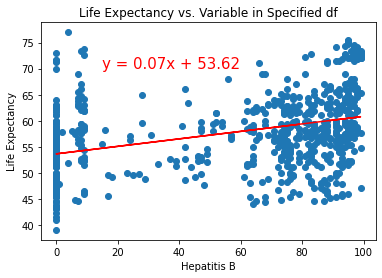

In [86]:
#Linear Regression/Basic Scatter Plot Code (switch df and x for desired outcome)
#Input Variable vs Life Expectancy
(slope, intercept, rvalue, pvalue, stderr) = linregress(africa_0["Hepatitis B"], africa_0['Life Expectancy'])
regress_values = africa_0["Hepatitis B"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(africa_0["Hepatitis B"], africa_0['Life Expectancy'])
plt.plot(africa_0["Hepatitis B"], regress_values, "r-")
plt.annotate(line_eq,(15,70),fontsize=15,color="red")
plt.xlabel("Hepatitis B")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Variable in Specified df")
#plt.savefig("output_data/north_lat_vs_maxtemp.png")
plt.show()

<AxesSubplot:xlabel='Diphtheria', ylabel='Life Expectancy'>

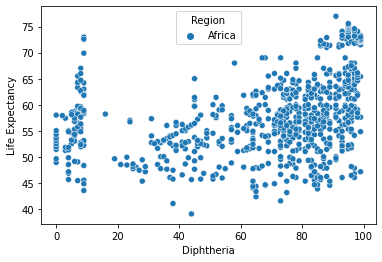

In [76]:
#Seaborn Scatter Plot for Input Variable(x) vs. Life Expectancy
sns.scatterplot(data=africa_0, x="Diphtheria", y="Life Expectancy", hue='Region')

In [77]:
max_value = nan0_df["Measles"].max()
max_value

212183

In [78]:
#Plotly Scatter Plot (switch out df and x_axis for desired outcome)
fig = px.scatter(africa_0, x="HIV/AIDS", y="Life Expectancy", animation_frame="Year", animation_group="Country",
           size="Population", color="Region", hover_name="Country",
           log_x=False, size_max=55, range_x=[0,100], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

In [100]:
import plotly.express as px


fig = px.scatter(undev_0, x="HIV/AIDS", y="Life Expectancy", animation_frame="Year", animation_group="Country",
           size="Population", color="Region", hover_name="Country",
           log_x=True, size_max=55, range_x=[.08,50], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

In [99]:
fig = px.scatter(undev_mean, x="HIV/AIDS", y="Life Expectancy", animation_frame="Year", animation_group="Country",
           size="Population", color="Region", hover_name="Country",
           log_x=True, size_max=55, range_x=[.08,50], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

In [106]:
#Life Expectancy Outliers for HIV/AIDS by Region
max_HIV = nan0_df.groupby('Year')['HIV/AIDS'].max()
max_HIV = max_HIV.reset_index()

HIV_df = max_HIV.merge(mean_df, how='left', on=['Year', 'HIV/AIDS'])
HIV_df.head(40)

regions = ["Africa", "Americas", "Europe", "Eastern Mediterranean", "Western Pacfic", "South-East Asia"]

HIV_data = []


,Year,HIV/AIDS,Country,Region,Status,Life Expectancy,Adult Mortality,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Polio,Total Expenditure,Diphtheria,GDP,Population,Schooling
0,2000,46.4,Swaziland (Eswatini),Africa,Developing,48.4,536.0,7.190000,25.216833,83.0,10,25.9,87.0,5.26000,84.0,1637.456700,161468.0,9.4
1,2001,48.8,Swaziland (Eswatini),Africa,Developing,47.1,568.0,6.720000,143.619732,86.0,49,26.3,87.0,5.11000,84.0,1437.634951,172927.0,9.3
2,2002,49.9,Swaziland (Eswatini),Africa,Developing,46.4,587.0,5.520000,131.042127,88.0,37,26.7,87.0,5.16000,85.0,1324.996228,1893.0,9.2
3,2003,50.6,Swaziland (Eswatini),Africa,Developing,45.9,6.0,5.650000,2.819124,9.0,350,27.1,87.0,5.71000,85.0,22.994490,187392.0,9.1
4,2004,50.3,Swaziland (Eswatini),Africa,Developing,45.6,69.0,5.780000,37.438577,93.0,0,27.4,88.0,5.88000,86.0,2529.633557,19553.0,9.4
5,2005,49.1,Swaziland (Eswatini),Africa,Developing,46.0,63.0,5.080000,372.165147,95.0,0,27.8,88.0,6.80000,86.0,2873.862141,115873.0,9.7
6,2006,43.7,Swaziland (Eswatini),Africa,Developing,47.8,564.0,5.530000,437.080244,93.0,0,28.2,88.0,6.81000,87.0,2937.367230,112514.0,9.9
7,2007,40.7,Swaziland (Eswatini),Africa,Developing,50.0,51.0,5.550000,43.366500,92.0,0,28.5,88.0,7.50000,87.0,347.487980,1138434.0,10.5
8,2008,40.2,Swaziland (Eswatini),Africa,Developing,51.4,477.0,4.870000,413.006303,9.0,1,28.9,89.0,8.19000,88.0,2842.438422,1158897.0,10.6
9,2009,33.7,Swaziland (Eswatini),Africa,Developing,52.6,46.0,4.900000,47.616452,88.0,26,29.3,89.0,8.46000,88.0,332.517125,118675.0,10.8
